In [10]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import functions.data_wrangling as dw
import functions.eddy_feedback as ef 

In [11]:
path = '/home/links/ct715/data_storage/reanalysis/srip_datasets' 
file = 'JRA55_srip_ubar_div1.nc'

ds = xr.open_dataset(f'{path}/{file}')
ds = ds.rename({'div1_pr': 'divFy'})
ds = ds[['ubar', 'divFy']]

print('EFP NH:', ef.calculate_efp(ds, data_type='reanalysis'))
print('EFP SH:', ef.calculate_efp(ds, data_type='reanalysis', calc_south_hemis=True))
ds

EFP NH: 0.4502
EFP SH: 0.3584


<xarray.Dataset>
Dimensions:   (time: 708, pressure: 22, latitude: 73)
Coordinates:
  * time      (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T09:00:00
  * pressure  (pressure) float32 1e+03 925.0 850.0 700.0 ... 5.0 3.0 2.0 1.0
  * latitude  (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
Data variables:
    ubar      (time, pressure, latitude) float32 ...
    divFy     (time, pressure, latitude) float32 ...

In [12]:
djf = dw.seasonal_mean(ds, season='djf')
jas = dw.seasonal_mean(ds, season='jas')

In [13]:
# Bootstrap resampling over 'time'
num_bootstrap_samples = 1000
bootstrap_indices = np.random.choice(djf.sizes["time"], size=(num_bootstrap_samples, djf.sizes["time"]), replace=True)

# Resample
bootstrap_djfsets = [djf.isel(time=idx) for idx in bootstrap_indices]

# Bootstrap resampling over 'time'
num_bootstrap_samples = 1000
bootstrap_indices = np.random.choice(jas.sizes["time"], size=(num_bootstrap_samples, jas.sizes["time"]), replace=True)

# Resample
bootstrap_jassets = [jas.isel(time=idx) for idx in bootstrap_indices]

In [14]:
efp_djf_values = []
for item in bootstrap_djfsets:
    
    efp_djf = ef.calculate_efp(item, data_type='reanalysis', bootstrapping=True)
    efp_djf_values.append(efp_djf)
    
# save the efp values
save_path = f'/home/links/ct715/eddy_feedback/chapter1/saffin/bootstrap/data/JRA55_djf_efp_values.npy'
np.save(save_path, efp_djf_values)

In [15]:

efp_jas_values = []
for item in bootstrap_jassets:
    
    efp_jas = ef.calculate_efp(item, data_type='reanalysis', calc_south_hemis=True, bootstrapping=True)
    efp_jas_values.append(efp_jas)
    
# save the efp values
save_path = f'/home/links/ct715/eddy_feedback/chapter1/saffin/bootstrap/data/JRA55_jas_efp_values.npy'
np.save(save_path, efp_jas_values)

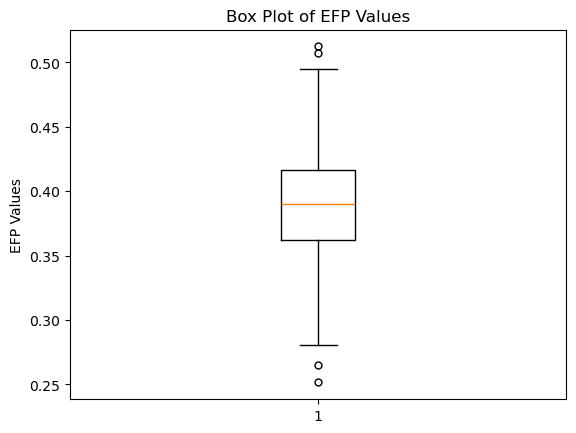

In [16]:
plt.boxplot(efp_djf_values, flierprops=dict(marker='o', color='r', markersize=5))
plt.title('Box Plot of EFP Values')
plt.ylabel('EFP Values')
plt.show()

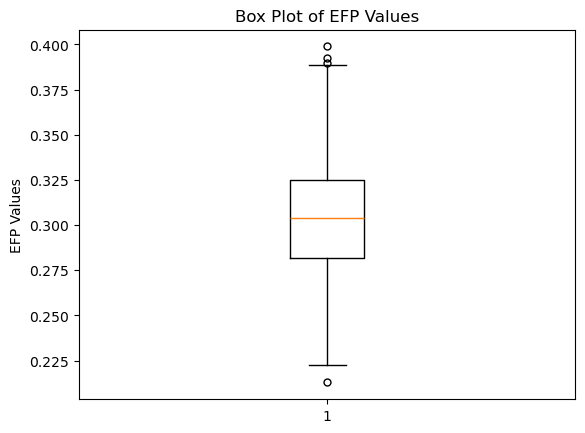

In [17]:
plt.boxplot(efp_jas_values, flierprops=dict(marker='o', color='r', markersize=5))
plt.title('Box Plot of EFP Values')
plt.ylabel('EFP Values')
plt.show()